In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
class Perceptron:
  def __init__(self, eta = 0.01, iterations = 100):
    self.eta = eta
    self.iterations = iterations

  def fit(self, x, y):
    self.w = np.random.normal(size = x.shape[1], scale = 0.01)
    self.b = 0.0

    self.errors = []

    for i in range(self.iterations):
      error = 0

      for xi, target in zip(x, y):
        zi = np.dot(xi, self.w) + self.b

        if zi > 0:
          y_predi = 1
        else:
          y_predi = 0

        self.w += (target - y_predi) * self.eta * xi
        self.b += (target - y_predi) * self.eta

        error += int(((target - y_predi) != 0))

      self.errors.append(error)
    return self

  def predict(self, x_test, y_test):
    self.y_preds = []

    for xi, target in zip(x_test, y_test):
        zi = np.dot(xi, self.w) + self.b

        if zi > 0:
          y_predi = 1
        else:
          y_predi = 0

        self.y_preds.append(y_predi)
    return self.y_preds




In [ ]:
iris = datasets.load_iris()

x = iris.data[0:100]
y = iris.target[0:100]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, shuffle = True)

In [ ]:
perceptron1 = Perceptron(0.001, 10)
fit = perceptron1.fit(x_train, y_train)

print(perceptron1.errors)

[16, 2, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
y_pred = perceptron1.predict(x_test, y_test)
sum = 0

for i in range(len(y_pred)):
  if y_pred[i] == y_test[i]:
    sum += 1

print((sum / len(y_pred)))

1.0


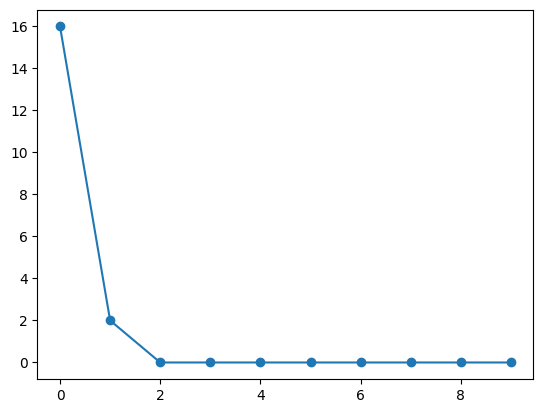

In [ ]:
plt.plot(perceptron1.errors, marker = "o")